In [14]:
# Pillow, OpenCV, and helper libraries
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature, measure, morphology
import random

# Load image
image_path = "F:/Programming/pwb-dist/images/test.png"

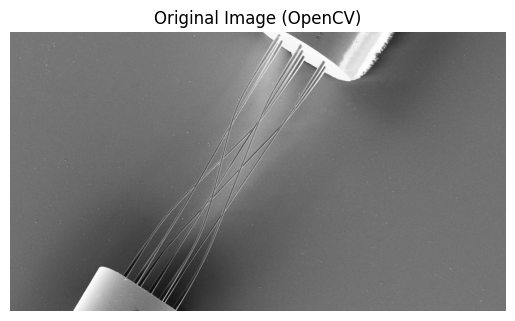

In [5]:
# Using PIL
img_pil = Image.open(image_path)
img_pil.show()

# Using OpenCV (BGR to RGB)
img_cv = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Plot
plt.imshow(img_rgb)
plt.title("Original Image (OpenCV)")
plt.axis("off")
plt.show()


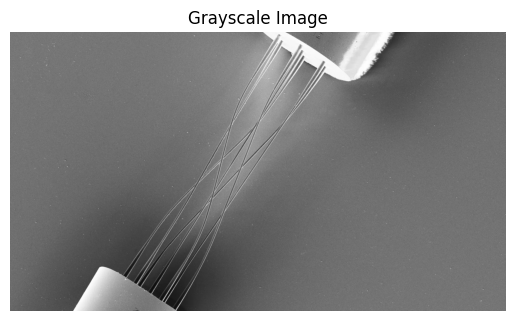

In [6]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


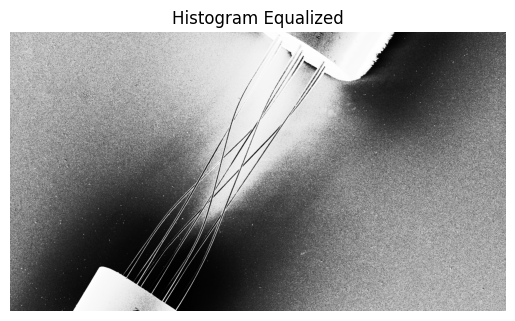

In [7]:
# Using OpenCV
equalized = cv2.equalizeHist(gray)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()


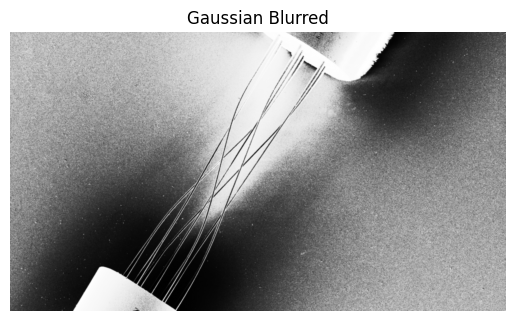

In [8]:
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")
plt.show()


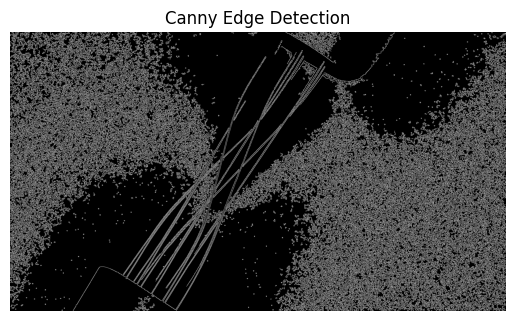

In [9]:
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


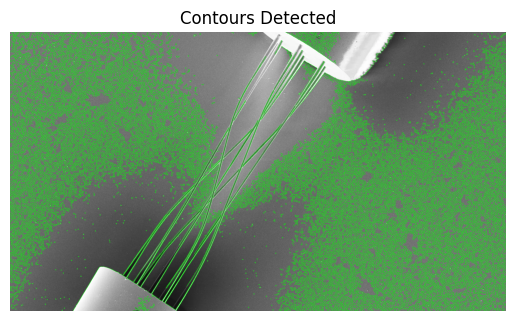

In [30]:
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img_rgb.copy()
cv2.drawContours(img_contours, contours, -1, (0,255,0), 1)

plt.imshow(img_contours)
plt.title("Contours Detected")
plt.axis("off")
plt.show()


In [31]:
lengths = [cv2.arcLength(cnt, True) for cnt in contours]
print("Detected Feature Lengths (approx):", lengths[:5])  # Show first 5


Detected Feature Lengths (approx): [0.0, 0.0, 7.656854152679443, 12.828427076339722, 5.414213538169861]


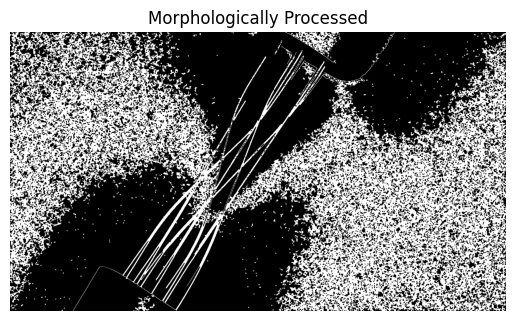

In [12]:
# Morphological operations
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

plt.imshow(morph, cmap='gray')
plt.title("Morphologically Processed")
plt.axis("off")
plt.show()


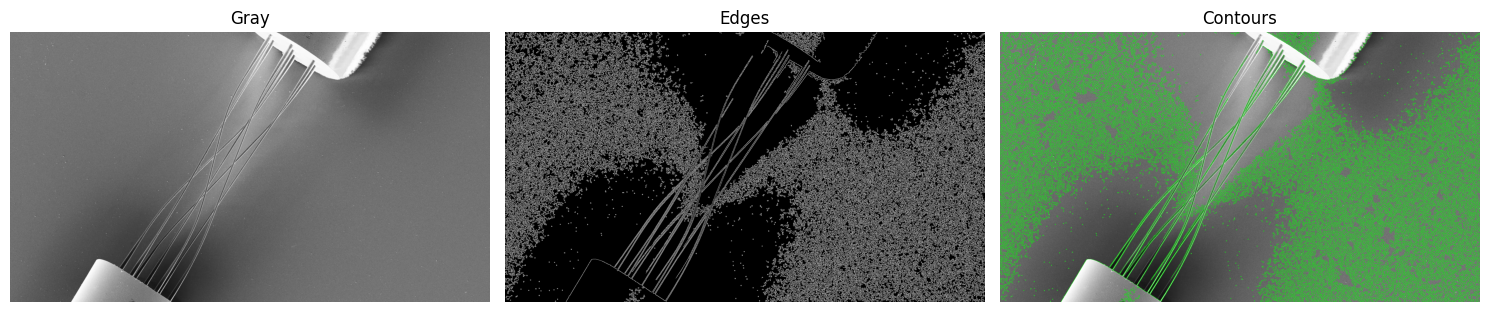

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray'); axes[0].set_title('Gray')
axes[1].imshow(edges, cmap='gray'); axes[1].set_title('Edges')
axes[2].imshow(img_contours); axes[2].set_title('Contours')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np

points = []

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(img_display, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("Click two points", img_display)
        if len(points) == 2:
            dist = np.linalg.norm(np.array(points[0]) - np.array(points[1]))
            print("Distance in pixels:", dist)

# Load and display image
img_display = img_rgb.copy()  # Use previously loaded RGB image
cv2.imshow("Click two points", img_display)
cv2.setMouseCallback("Click two points", click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()
